In [2]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [6]:
a = pd.read_csv("ecoli.txt")

In [37]:
cp = a[a["class"] == "cp"]
imU = a[a["class"] == "imU"]

In [38]:
aa = pd.concat([cp,imU],axis=0, ignore_index=True)
aa.head()

,Sequence,mcv,gvh,lip,chg,aac,alm1,alm2,class
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [77]:
aa = aa[["alm1","mcv","class"]]
aa["c"] =1
aa.loc[aa["class"] == "cp", "c"] =0

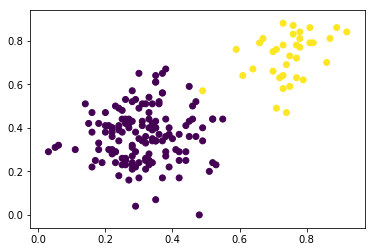

In [81]:
plt.scatter([aa["alm1"]],aa["mcv"],c=aa["c"])

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    aa[["alm1","mcv"]], aa[['c']], test_size=0.2, random_state=0)

In [84]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [85]:
from sklearn.svm import SVC

In [86]:
svm = SVC(kernel='linear', probability=True) #kernel線性預測，probability顯示機率

In [88]:
svm.fit(X_train_std,y_train['c'].values)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [90]:
svm.predict(X_test_std)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [91]:
y_test['c'].values

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [93]:
error = 0
for i, v in enumerate(svm.predict(X_test_std)):
    if v!= y_test['c'].values[i]:
        error+=1
print(error)

0


In [94]:
svm.predict_proba(X_test_std)

array([[9.98357943e-01, 1.64205747e-03],
       [1.47988051e-01, 8.52011949e-01],
       [9.99580997e-01, 4.19002765e-04],
       [9.70764954e-01, 2.92350464e-02],
       [9.99747348e-01, 2.52651560e-04],
       [9.99392808e-01, 6.07192299e-04],
       [9.99074440e-01, 9.25559882e-04],
       [3.38244589e-02, 9.66175541e-01],
       [9.75273590e-01, 2.47264100e-02],
       [9.92881281e-01, 7.11871915e-03],
       [9.94086013e-01, 5.91398704e-03],
       [3.66875281e-02, 9.63312472e-01],
       [8.52935731e-01, 1.47064269e-01],
       [8.87087986e-01, 1.12912014e-01],
       [8.01407013e-03, 9.91985930e-01],
       [9.92881281e-01, 7.11871915e-03],
       [9.88199229e-01, 1.18007713e-02],
       [9.98904442e-01, 1.09555832e-03],
       [9.87377044e-01, 1.26229560e-02],
       [9.99937670e-01, 6.23302290e-05],
       [9.97454444e-01, 2.54555647e-03],
       [9.51032275e-01, 4.89677254e-02],
       [9.99269062e-01, 7.30938433e-04],
       [9.98438941e-01, 1.56105948e-03],
       [9.319977

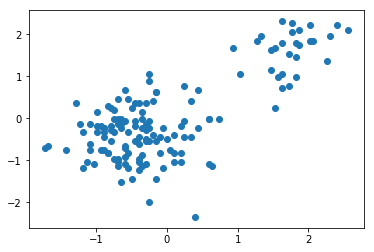

In [95]:
plt.scatter(X_train_std[:,0],X_train_std[:,1])

In [98]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

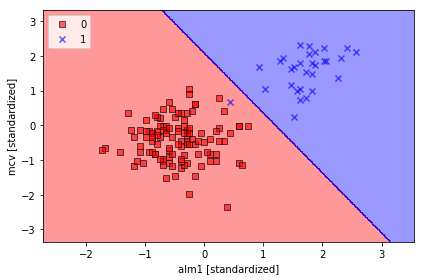

In [100]:
plot_decision_regions(X_train_std, y_train['c'].values, classifier=svm)
plt.xlabel('alm1 [standardized]')
plt.ylabel('mcv [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

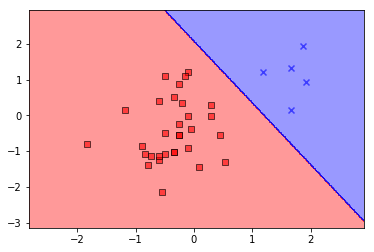

In [103]:
plot_decision_regions(X_test_std, y_test['c'].values, classifier=svm)